# **Introduction to Machine Learning**
### **Computer Homework 1**

Radmehr Karimian

Student ID: 98103556




# C1

## a) Loading Data
Using the read_csv() function from *pandas* library, we extract data from Q1_data.csv (which has the DataFrame data type) and then transform it to numpy array:

In [455]:
# Importing libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [456]:
from google.colab import drive
drive.mount('/media/gdrive', force_remount=True)

df = pd.read_csv(r'/media/gdrive/MyDrive/ML/CHW1/Q1_data.csv')
raw_data = df.values
raw_data = np.array(object=df)

Mounted at /media/gdrive


raw_data has 502 rows and 9 columns in which:



*Col 1 : N of sample*

*Col 2-8 : Data*

*Col 9 : Admission chance*


Training set contains data from sample 1 to 402 and the Validation set contains data from sample 403 to 502 (100 samples in total)

In [457]:
S = raw_data[0:402,1:8]
V = raw_data[402:502,1:8]
label_S = raw_data[0:402,8]
label_V = raw_data[402:502,8]

## b) Calculating the optimal W
Vector x_i contains data for each sample including the bias (to make training set of X homogenous):


```
transpose(x_i) = [ 1, GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research ]
```

Matrix X is the matrix that contains *x_i* s (for all *x_i* s in training set):

```
X = [ x_1, x_2, ... , x_n ]
A = X * X^T
```
*(A is a non-singular matrix and invertible)*
```
beta = X * Y
```
*(Y is the label vector which is the admission chance for each sample)*
```
A * W = X * X^T * W = X * Y = beta
W = A^-1 * beta
```
*where W is the optimal W vector ( gradient( L_s(W) ) = 0 ) )*


In [458]:
X = np.concatenate((np.ones(shape=(1,402)), np.transpose(S)), axis=0)
A = np.matmul(X, np.transpose(X))
beta = np.matmul(X, label_S)
W = np.matmul(np.linalg.inv(A), beta)
print('W = ', W)

W =  [-1.14854141  0.0013267   0.00251244  0.00595324  0.00377221  0.01610903
  0.12575304  0.02376599]


*(The coefficient is the constant bias)*

## c) Calculating *Empirical Risk* and *True Risk*
Estimated label for Training set is calculated using the following equation:
```
h_s(x) = X^T * W
```
The Mean Square Error is calculated using the following equation:
```
L_s(w) = (1/n) sum( (y_i - h_s(x_i))^2 )
```
*where y_i is the actual value of admission chance*



In [459]:
S2 = np.transpose(X)
estimated = np.matmul(S2, W)
Ls = (1/label_S.size)*np.dot((estimated-label_S),(estimated-label_S))
print('Emperical Risk : {0:5f}'.format(Ls))

Emperical Risk : 0.003473


We use the validation set to estimate the true risk:

In [460]:
V2 = np.transpose(np.concatenate((np.ones(shape=(1,100)), np.transpose(V)), axis=0))
estimated = np.matmul(V2, W)
Ld = (1/label_V.size)*np.dot((estimated-label_V),(estimated-label_V))
print('True Risk : {0:5f}'.format(Ld))

True Risk : 0.003860


The Emperical Risk and True Risk are close enough. In conclusion the model is not over-fitted.

The estimated True Risk is small, so the model is a good estimator.

## d) Choosing the best feature to estimate the label
Based on the distributions of chance of admission for each feature, the distribution for the CGPA feature is the closest to a linear estimation and the chance of admission varies less for each value of CGPA. 

Also the CGPA can have multiple values (unlike other feature like Research) and we can esstimate the chance of admission with more precision.

In [461]:
GRE_score = raw_data[0:402,1]
TOEFL_score = raw_data[0:402,2]
university_rating = raw_data[0:402,3]
SOP = raw_data[0:402,4]
LOR = raw_data[0:402,5]
CGPA = raw_data[0:402,6]
research = raw_data[0:402,7]
chance = raw_data[0:402,8]

Text(0, 0.5, 'Chance of Admission')

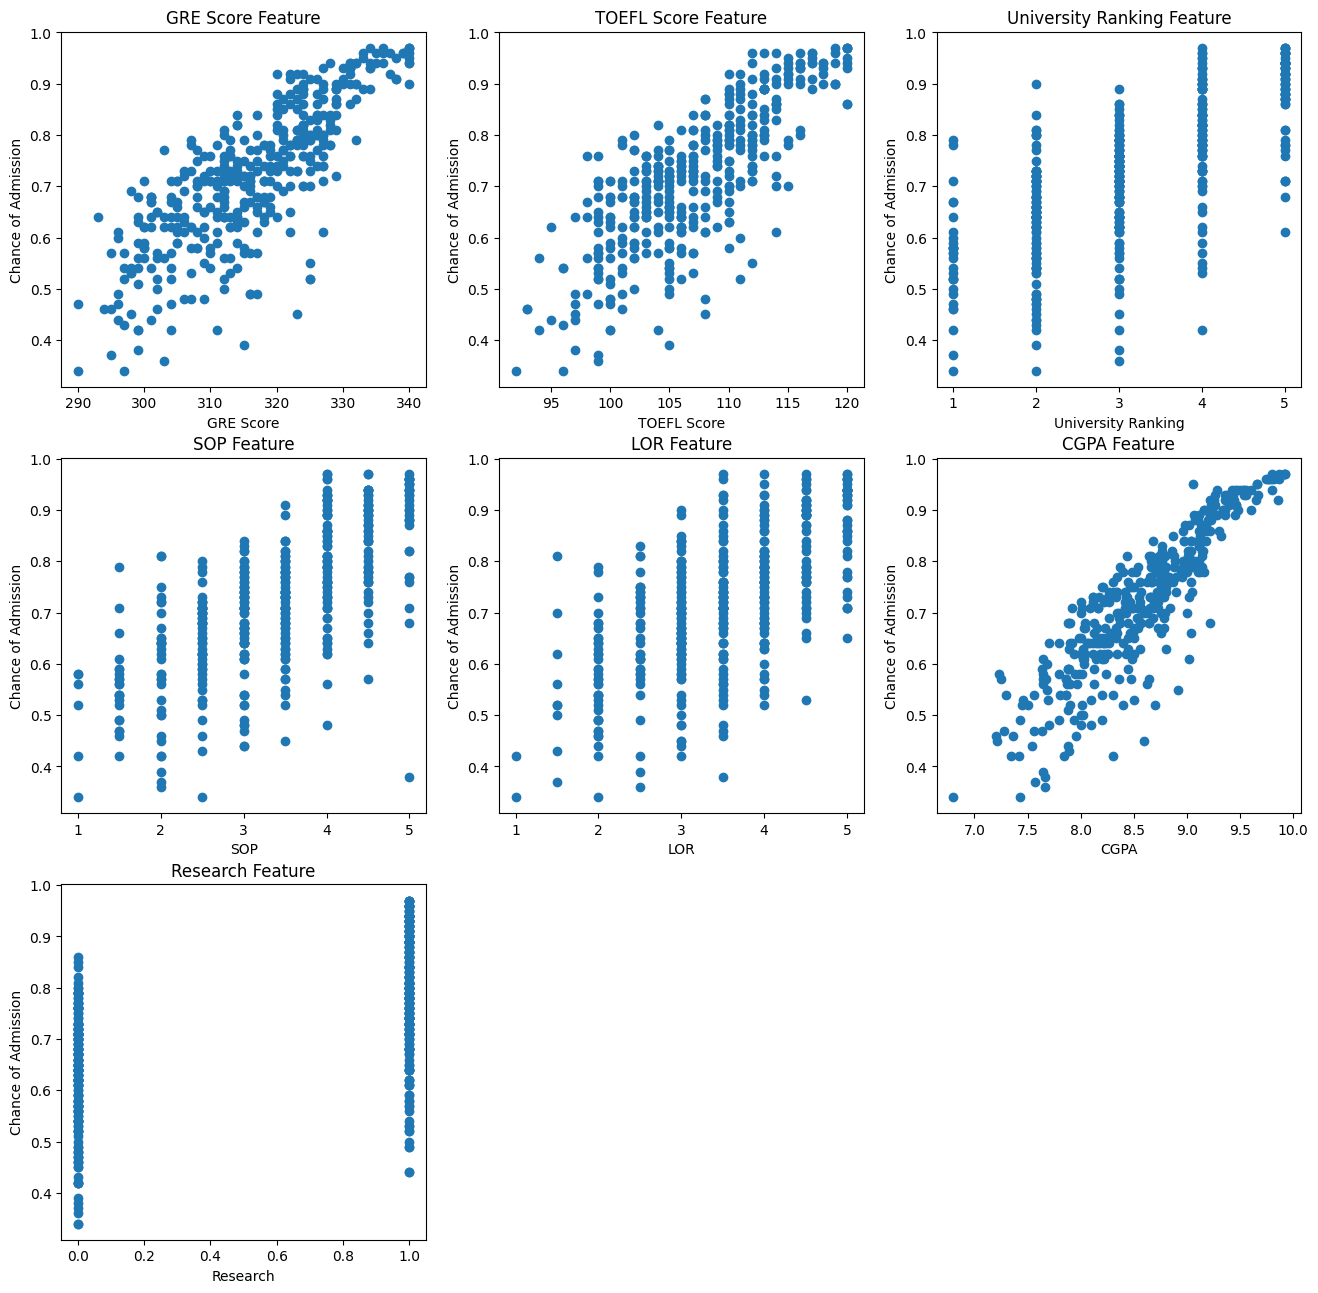

In [462]:
plt.figure(figsize=(16, 16))

plt.subplot(3,3,1)
plt.scatter(GRE_score, chance)
plt.title('GRE Score Feature')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")

plt.subplot(3,3,2)
plt.scatter(TOEFL_score, chance)
plt.title('TOEFL Score Feature')
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admission")

plt.subplot(3,3,3)
plt.scatter(university_rating, chance)
plt.title('University Ranking Feature')
plt.xlabel("University Ranking")
plt.ylabel("Chance of Admission")

plt.subplot(3,3,4)
plt.scatter(SOP, chance)
plt.title('SOP Feature')
plt.xlabel("SOP")
plt.ylabel("Chance of Admission")

plt.subplot(3,3,5)
plt.scatter(LOR, chance)
plt.title('LOR Feature')
plt.xlabel("LOR")
plt.ylabel("Chance of Admission")

plt.subplot(3,3,6)
plt.scatter(CGPA, chance)
plt.title('CGPA Feature')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")

plt.subplot(3,3,7)
plt.scatter(research, chance)
plt.title('Research Feature')
plt.xlabel("Research")
plt.ylabel("Chance of Admission")


## e) Coefficients of linear regression for CGPA feature
The process of calculating W and risks is explained in previous sections.

In [463]:
S = raw_data[0:402,6]
V = raw_data[402:502,6]
label_S = raw_data[0:402,8]
label_V = raw_data[402:502,8]

X = np.concatenate((np.ones(shape=(1,402)), np.transpose(S).reshape(1,402)), axis=0)
A = np.matmul(X, np.transpose(X))
beta = np.matmul(X, label_S)
W = np.matmul(np.linalg.inv(A), beta)
print('W = ', W)

W =  [-1.04294068  0.20539181]


## f) Empirical Risk and True Risk of the linear regression

In [464]:
S2 = np.transpose(X)
estimated = np.matmul(S2, W)
Ls = (1/402.)*np.dot((estimated-label_S),(estimated-label_S))
print('Empirical Risk : {0:5f}'.format(Ls))

V2 = np.transpose(np.concatenate((np.ones(shape=(1,100)), np.transpose(V).reshape(1,100)), axis=0))
estimated = np.matmul(V2, W)
Ld = (1/100.)*np.dot((estimated-label_V),(estimated-label_V))
print('True Risk : {0:5f}'.format(Ld))

Empirical Risk : 0.004140
True Risk : 0.005420


The errors are still small and the estimated True Risk is close to the Empirical Risk, so the linear regression using the CGPA feature is a good estimator.

## g) Comparison of regressions

The value of Empirical Risk and the estimated True Risk are higher for the regression using only one feature (the difference is not substantial), so the estimation using multiple features is more accurate (because it has more data to estimate the chance of admition.

# C2

Loading data is similar to part a of C1:

In [444]:
from google.colab import drive
drive.mount('/media/gdrive', force_remount=True)

data_S = np.load(r'/media/gdrive/MyDrive/ML/CHW1/train_data.npy')
data_V = np.load(r'/media/gdrive/MyDrive/ML/CHW1/validation_data.npy')
data_T = np.load(r'/media/gdrive/MyDrive/ML/CHW1/test_data.npy')


Mounted at /media/gdrive


## a) Calculating optimal W, L_S, L_V and L_T for each n
The process of calculating W and risks is explained in C1.

In [450]:
S = data_S[:,0].reshape(30,1)
label_S = data_S[:,1].reshape(30,1)

V = data_V[:,0].reshape(40,1)
label_V = data_V[:,1].reshape(40,1)

T = data_T[:,0].reshape(40,1)
label_T = data_T[:,1].reshape(40,1)

Note that the feature vector (x_i) and feature matrix (X) for each n is:


```
transpose(x_i) = [ x^0, x^1, ... , x^n ]
X = [ x_1, x_2, ..., x_m ]
```



In [452]:
n_max = 15
L_S = []
L_V = []
L_T = []
Ws = []

for n in range(1,n_max+1,1):
  print('For n =',n)
  X = np.transpose(S**np.arange(start=0, stop=n+1, step=1))
  A = np.matmul(X, np.transpose(X))
  beta = np.matmul(X, label_S)
  W = np.matmul(np.linalg.inv(A), beta)
  print('W = ', np.transpose(W))
  Ws.append(W)

  S2 = np.transpose(X)
  V2 = V**np.arange(start=0, stop=n+1, step=1)
  T2 = T**np.arange(start=0, stop=n+1, step=1)

  estimated_S = np.matmul(S2, W)
  estimated_V = np.matmul(V2, W)
  estimated_T = np.matmul(T2, W)

  L_S.append((1/label_S.size)*np.sum((estimated_S-label_S)**2))
  L_V.append((1/label_V.size)*np.sum((estimated_V-label_V)**2))
  L_T.append((1/label_T.size)*np.sum((estimated_T-label_T)**2))
  print('L_S =', L_S[n-1], ', L_V =', L_V[n-1], ', L_T =', L_T[n-1])
  print('\n')
  

For n = 1
W =  [[ 0.3028272  -0.17115968]]
L_S = 0.7618038655184616 , L_V = 1.1011413142097335 , L_T = 0.6856204094212921


For n = 2
W =  [[-0.47153391  0.02303306  0.61487693]]
L_S = 0.25136046057337025 , L_V = 0.5175189063457092 , L_T = 0.47361912092035335


For n = 3
W =  [[-0.44772657 -0.21431613  0.63302358  0.09907814]]
L_S = 0.24056692391876824 , L_V = 0.4335416391559493 , L_T = 0.4207180755677586


For n = 4
W =  [[-0.13999917 -0.28076096 -0.30608827  0.17859025  0.29402467]]
L_S = 0.148078699056537 , L_V = 0.37267374569236456 , L_T = 0.33017199670572706


For n = 5
W =  [[-0.14467118  0.28887691 -0.48285907 -0.52448461  0.37396026  0.17091315]]
L_S = 0.1227347314442024 , L_V = 0.5034182124316063 , L_T = 0.35337371195645356


For n = 6
W =  [[-0.32165221  0.21470849  0.79148165 -0.65529921 -0.67297717  0.23686129
   0.20954853]]
L_S = 0.08872308853571909 , L_V = 0.6973543705872096 , L_T = 0.3039075024719229


For n = 7
W =  [[-0.32123719  0.20067219  0.79125773 -0.61887301 -0.

## b) Plotting L_S and L_V for each n
The optimal model is dependent on the training set, so the decrease of the empirical risk for higher degree of the polynomial could be a sign of over-fitting. 
To avoid over-fitting the model, we should compare L_S and L_V. The optimal model is independent of the validation set, so L_V is a good estimation of the true risk and it could indicate over-fitting.


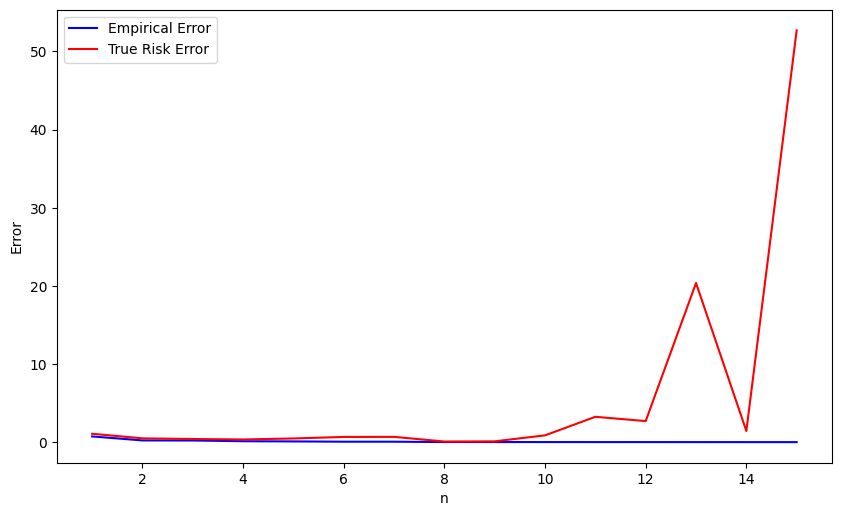

In [449]:
plt.figure(figsize=(10, 6))
N = [t for t in range(1, 15 + 1)]
plt.plot(N, L_S, c='b', label='Empirical Error')
plt.plot(N, L_V, c='r', label='True Risk Error')
plt.xlabel("n")
plt.ylabel("Error")
plt.legend()
plt.show()

## c) The relation between L_S, L_V and the model
The empirical risk decreases as n grows. As explained in the previous part, the model is optimised for the training set and it’s a function of the training set, so the increase of the degree could cause the loss of generality of the model and cause over-fitting, however, the validation set is independent of this process of optimisation, so it indicates the loss of gerenality and over-fitting. We can see that L_V starts to grow from n = 9 and it is minimised for n = 8.

## d) Finding the best model
We use L_V to choose the best degree of the polynomial to avoid over-fitting  (as explained in the previous parts). L_V starts to grow from n = 9 and it is minimised for n = 8, so the 8-degree polynomial is the best model.

## e) Calculating L_T for n = 8 model

In [454]:
print('For n = 8, L_T is', L_T[7])

For n = 8, L_T is 0.1179142479733431


## f) The usage of a third set to validate the final results
The validation set is used to indicate the best model (degree of n) to prevent over-fitting the model, so the model is dependent on the validation set (this dependency is weaker than the dependency of the model on the training set).
So to have a better estimation of the true risk, we should use a third set (the test set that the process of creating and choosing the model is independent of) to validate the final model.